# Rain Jarghoyeh Esf

In [308]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Markdown, Math
from scipy.special import erf
from scipy.optimize import minimize

# Raw data from Ministry of Energy of Iran

Rain for Jarghoyeh (Mohammad Abad) station, east of Esfahan Province
Latitude  32.322105° N, Longitude  52.084177° E
Source: Iran Water Resources Management Company wrm.ir, Ministry of Energy of Iran


,P_24h (mm)
1372.0,10.0
1373.0,33.5
1374.0,22.0
1375.0,9.0
1376.0,21.0
1377.0,15.0
1378.0,20.0
1379.0,16.5
1380.0,14.5
1381.0,12.0


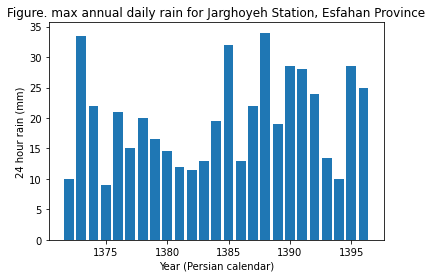

In [309]:
print('Rain for Jarghoyeh (Mohammad Abad) station, east of Esfahan Province')
print('Latitude  32.322105° N, Longitude  52.084177° E')
print('Source: Iran Water Resources Management Company wrm.ir, Ministry of Energy of Iran')


rain=np.array([[1372,10],[1373,33.5],[1374,22],[1375,9],[1376,21],[1377,15],
[1378,20],[1379,16.5],[1380,14.5],[1381,12],[1382,11.5],[1383,13],
[1384,19.5],[1385,32],[1386,13],[1387,22],[1388,34],[1389,19],
[1390,28.5],[1391,28],[1392,24],[1393,13.5],[1394,10],[1395,28.5],[1396,25]])

year=rain[:,0]
rain24max=rain[:,1]

df=pd.DataFrame(rain24max,columns=['P_24h (mm)'],index=year)
df.style.format("{.2g}")
display(df)

plt.figure()
plt.bar(year,rain24max)
plt.xlabel('Year (Persian calendar)')
plt.ylabel('24 hour rain (mm)')
plt.title('Figure. max annual daily rain for Jarghoyeh Station, Esfahan Province')
plt.show()

# Analyzing return period

source: Return Period, Wikipedia


the 24 hour rain is sorted in descending order
N= 25 =number of years on record


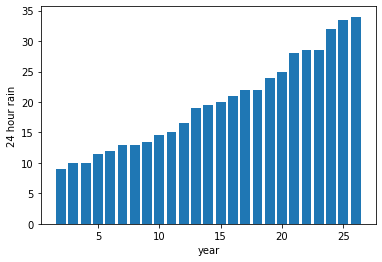

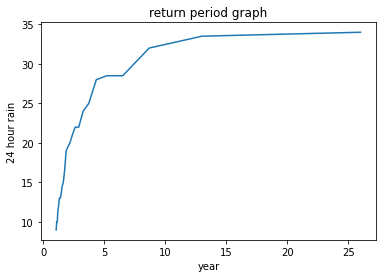

In [310]:
print('source: Return Period, Wikipedia')
display(HTML("""<a href="https://en.wikipedia.org/wiki/Return_period">https://en.wikipedia.org/wiki/Return_period</a>"""))

print('the 24 hour rain is sorted in descending order')
rain24sort=-np.sort(-rain24max)
N=len(rain24sort)



print('N=',N,'=number of years on record')
recurence_interval=np.arange(1,N+1)
recurence_interval=(N+1)/recurence_interval

plt.figure()
plt.bar(np.arange(N+1,1,-1),rain24sort)
plt.xlabel('year')
plt.ylabel('24 hour rain')
plt.show()

plt.figure()
plt.plot(recurence_interval,rain24sort)
plt.xlabel('year')
plt.ylabel('24 hour rain')
plt.title('return period graph')
plt.show()

# Fitting distribution to data

In [311]:
x=recurence_interval
y=rain24sort

def func_cdf_lognormal(x,b):
    mu,sigma,a=b[0],b[1],b[2]
    return a*0.5*(1+erf((np.log(x)-mu)/(sigma*np.sqrt(2))))

func_cdf_lognormal_anonym = lambda b: func_cdf_lognormal(x,b)

def func_mse(y,b):
    yhat=func_cdf_lognormal_anonym(b)
    return 0.5*np.mean((y-yhat)*(y-yhat))

func_mse_anonym=lambda b:func_mse(y,b)

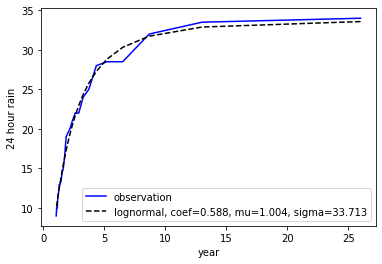

,return period,24 hour rain [mm]
0,2.0,18.262477
1,5.0,28.504709
2,10.0,32.234989
3,20.0,33.435229
4,50.0,33.697317
5,100.0,33.711938


In [312]:
b=[1,0.4,20]
b=minimize(func_mse_anonym,b).x
b=np.round(b,3)


str0='lognormal, coef='+str(b[0])+', mu='+str(b[1])+', sigma='+str(b[2])

rain24predict=func_cdf_lognormal_anonym(b)
plt.plot(recurence_interval,rain24sort,'b',label='observation')
plt.plot(recurence_interval,rain24predict,'k--',label=str0)
plt.xlabel('year')
plt.ylabel('24 hour rain')
plt.legend()
plt.show()

xx=[2,5,10,20,50,100]
oo=np.ones(len(xx))
yy=func_cdf_lognormal(xx,b)


result=pd.DataFrame(np.c_[xx,yy],columns=['return period','24 hour rain [mm]'])
display(result)

In [313]:
a=b[0]
mu=b[1]
sigma=b[2]

display(Markdown(rf"""Log normal CDF: $(\mu={mu:5.3} ,\sigma^2 ={sigma:5.3}^2)$"""))
display(Markdown(rf"""Coef: $a={a}$[mm/day]"""))
display(Math(r'CDF=\frac{1}{2}\left[1+erf\left(\frac{\ln{x}-\mu}{\sigma \sqrt{2}}\right)\right]'))


Log normal CDF: $(\mu=  1.0 ,\sigma^2 = 33.7^2)$

Coef: $a=0.588$[mm/day]

<IPython.core.display.Math object>

# Nearby stations

In [318]:
#baharestan
esf_bahar_y=np.array([2,5,10,20,50,100])
esf_bahar_a=np.array([70.811,88.811,102.504,119.804,141.355,156.888])
esf_bahar_b=np.array([4.854,0,0,0,0,0])
esf_bahar_c=np.array([0.599,0.582,0.580,0.586,0.591,0.595])

#airport
esf_air_y=np.array([2,5,10,20,50,100])
esf_air_a=np.array([87.727,150.351,193.358,237.249,348.407,337.274])
esf_air_b=np.array([0.013,0.013,0.013,0.14,2.766,0.361])
esf_air_c=np.array([0.649,0.703,0.727,0.747,0.786,0.780])

#yazd
esf_yazd_y=np.array([2,5,10,20,50,100])
esf_yazd_a=np.array([83.949,1262.00,3375.44,6425.84,12464.0,16087.0])
esf_yazd_b=np.array([53.451,93.042,103.432,108.900,115.137,114.498])
esf_yazd_c=np.array([0.700,1.017,1.123,1.188,1.254,1.272])

display(Math(r'\text{Intensity[mm/h]}=\frac{a}{\left(t \text{[min]}+b\right)^c}'))

df1=pd.DataFrame(np.c_[esf_bahar_y,esf_bahar_a,esf_bahar_b,esf_bahar_c],columns=['return period (year)','a','b','c'])
df2=pd.DataFrame(np.c_[esf_air_y,esf_air_a,esf_air_b,esf_air_c],columns=['return period (year)','a','b','c'])
df3=pd.DataFrame(np.c_[esf_yazd_y,esf_yazd_a,esf_yazd_b,esf_yazd_c],columns=['return period (year)','a','b','c'])

display('esf baharestan',df1,'esf airport',df2,'yazd',df3)


def func_15_1440(y,a,b,c,yy):
    i_1440=a/np.power(24*60+b,c)
    d_1440=i_1440*24
    i_15=a/np.power(15+b,c)
    d_15=i_15*(15/60)
    print('d1440',d_1440)
    #print('d15',d_15)
    print('i15',i_15)
    #print('d15/d14040', d_15/d_1440)
    print('i15 new',d_15/d_1440*yy*4)

func_15_1440(esf_bahar_y,esf_bahar_a,esf_bahar_b,esf_bahar_c,yy)
func_15_1440(esf_air_y,esf_air_a,esf_air_b,esf_air_c,yy)
func_15_1440(esf_yazd_y,esf_yazd_a,esf_yazd_b,esf_yazd_c,yy)

print('\n\n')
print(yy)


<IPython.core.display.Math object>

'esf baharestan'

,return period (year),a,b,c
0,2.0,70.811,4.854,0.599
1,5.0,88.811,0.000,0.582
2,10.0,102.504,0.000,0.580
3,20.0,119.804,0.000,0.586
4,50.0,141.355,0.000,0.591
5,100.0,156.888,0.000,0.595


'esf airport'

,return period (year),a,b,c
0,2.0,87.727,0.013,0.649
1,5.0,150.351,0.013,0.703
2,10.0,193.358,0.013,0.727
3,20.0,237.249,0.140,0.747
4,50.0,348.407,2.766,0.786
5,100.0,337.274,0.361,0.780


'yazd'

,return period (year),a,b,c
0,2.0,83.949,53.451,0.700
1,5.0,1262.000,93.042,1.017
2,10.0,3375.440,103.432,1.123
3,20.0,6425.840,108.900,1.188
4,50.0,12464.000,115.137,1.254
5,100.0,16087.000,114.498,1.272


d1440 [21.75591806 30.93933903 36.23279271 40.53985022 46.12434202 49.72505654]
i15 [11.82196761 18.36460736 21.31119892 24.50653107 28.52602384 31.3195438 ]
i15 new [ 9.92366332 16.9194885  18.95979316 20.21175387 20.84041604 21.23361092]
d1440 [18.7743417  21.72631013 23.46610475 24.89357734 27.48970865 27.83469386]
i15 [15.12188324 22.38977242 26.98176056 31.16379665 36.30023203 40.04752321]
i15 new [14.70959901 29.37516526 37.06438519 41.85692792 44.49739549 48.50348298]
d1440 [12.08629205 17.44062823 21.27502953 25.02611144 29.74341218 33.64988701]
i15 [ 4.35762315 10.78687548 15.84253351 20.9585482  27.80986295 33.08845187]
i15 new [ 6.58440075 17.62991241 24.0039097  28.00090844 31.50673402 33.14946709]



[18.26247654 28.50470913 32.23498865 33.43522884 33.69731733 33.71193751]
